In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Houses.csv', encoding= "ISO-8859-1")

In [13]:
df.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [14]:
df = df[['address', 'city', 'floor', 'price', 'rooms', 'sq', 'year']]

In [15]:
df['city'] = df['city'].map(lambda x: 'Poznan' if x=='Poznañ' else 'Krakow' if x=='Kraków' else x)
df['city'].unique()

array(['Krakow', 'Warszawa', 'Poznan'], dtype=object)

In [16]:
df['full_address'] = df['city']+', '+df['address']

In [17]:
df.head()

,address,city,floor,price,rooms,sq,year,full_address
0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Krakow,2.0,749000.0,3.0,74.05,2021.0,"Krakow, Podgórze Zab³ocie Stanis³awa Klimeckiego"
1,Praga-Po³udnie Grochowska,Warszawa,3.0,240548.0,1.0,24.38,2021.0,"Warszawa, Praga-Po³udnie Grochowska"
2,Krowodrza Czarnowiejska,Krakow,2.0,427000.0,2.0,37.00,1970.0,"Krakow, Krowodrza Czarnowiejska"
3,Grunwald,Poznan,2.0,1290000.0,5.0,166.00,1935.0,"Poznan, Grunwald"
4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,996000.0,5.0,105.00,2020.0,"Warszawa, Ochota Gotowy budynek. Stan dewelope..."


In [18]:
y = df['price']

In [19]:
X = df.drop(['address','price','full_address'],axis=1)
X.head()

,city,floor,rooms,sq,year
0,Krakow,2.0,3.0,74.05,2021.0
1,Warszawa,3.0,1.0,24.38,2021.0
2,Krakow,2.0,2.0,37.00,1970.0
3,Poznan,2.0,5.0,166.00,1935.0
4,Warszawa,1.0,5.0,105.00,2020.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       23764 non-null  object 
 1   city          23764 non-null  object 
 2   floor         23764 non-null  float64
 3   price         23764 non-null  float64
 4   rooms         23764 non-null  float64
 5   sq            23764 non-null  float64
 6   year          23764 non-null  float64
 7   full_address  23764 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [21]:
df.isnull().sum()

address         0
city            0
floor           0
price           0
rooms           0
sq              0
year            0
full_address    0
dtype: int64

In [22]:
%matplotlib inline

In [28]:
# remove Scientific Notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploratory Data Analysis and Visualization

Text(0.5, 1.0, 'Heatmap with outliers')

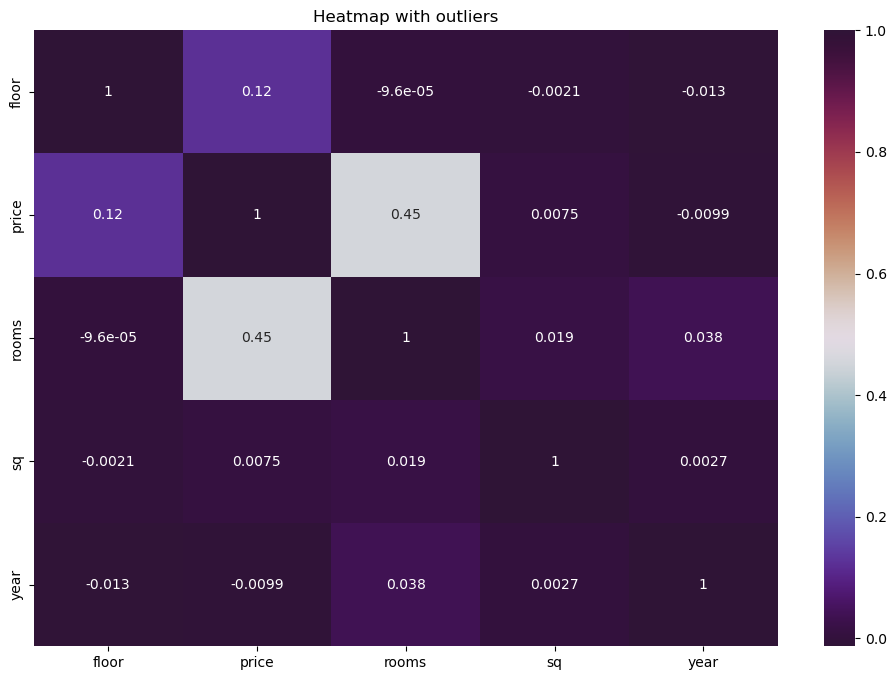

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='twilight_shifted')
plt.title('Heatmap with outliers')

In [32]:
df.describe()

,floor,price,rooms,sq,year
count,23764.00,23764.00,23764.00,23764.00,23764.00
mean,2.81,649353.65,2.62,102.72,2000.55
std,2.46,532696.99,1.00,6533.69,48.31
min,0.00,5000.00,1.00,8.80,70.00
25%,1.00,411546.12,2.00,42.00,1985.00
50%,2.00,520000.00,3.00,53.89,2019.00
75%,4.00,699999.00,3.00,68.91,2021.00
max,10.00,15000000.00,10.00,1007185.00,2980.00


C:\Users\annam\AppData\Local\Temp\ipykernel_7016\1479338021.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df01 = df01[df['sq']<=8000]


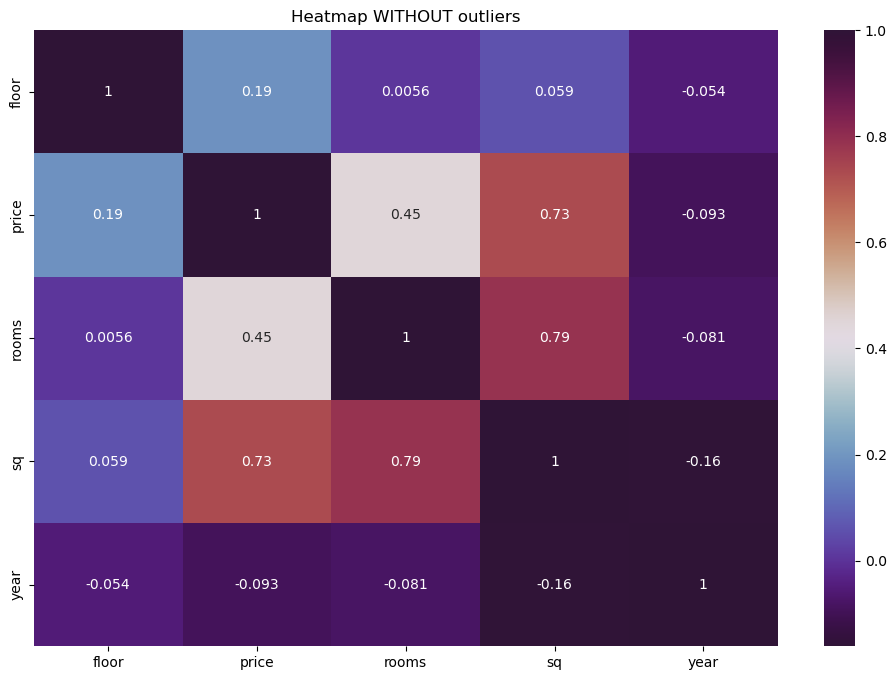

In [48]:
df01 = df[(df['year']<=2025) & (df['year']>=1985)]
df01 = df01[df['sq']<=8000]
plt.figure(figsize=(12,8))
# twilight_shifted, Pastel2, PuOr, coolwarm
sns.heatmap(df01.corr(), annot=True, cmap='twilight_shifted')
plt.title('Heatmap WITHOUT outliers')
plt.show()

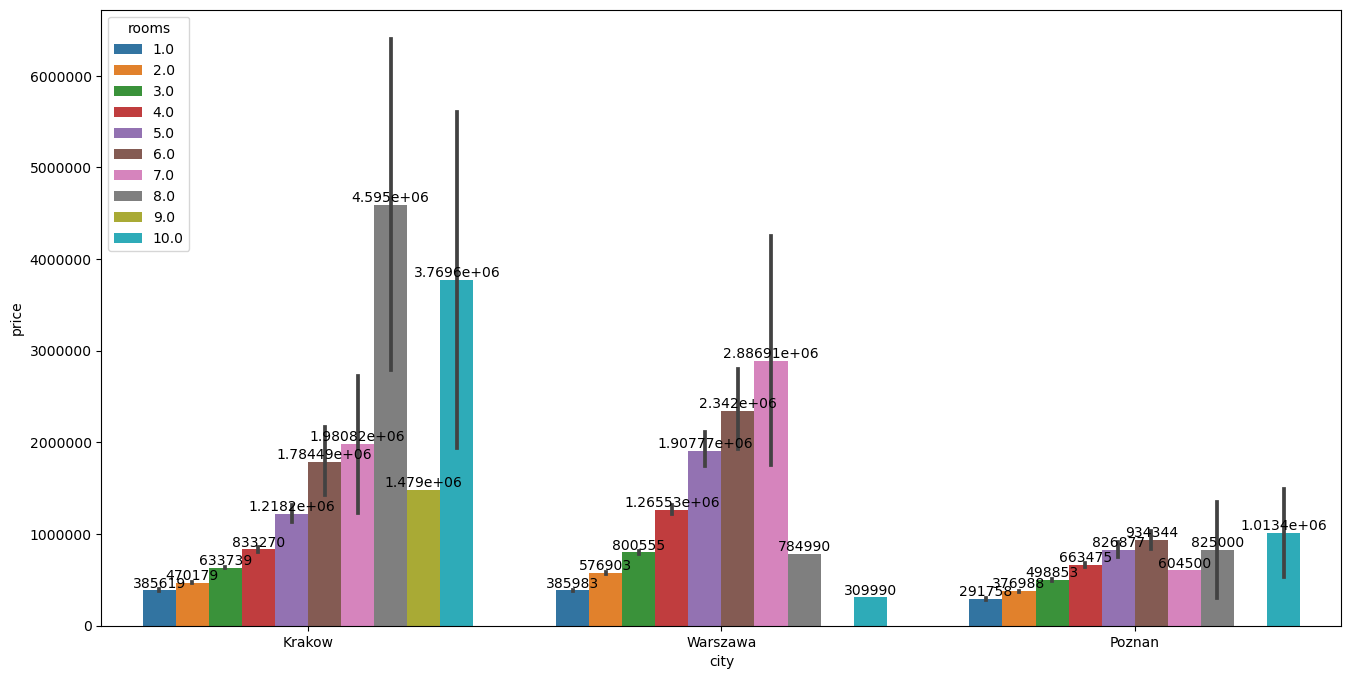

In [40]:
plt.figure(figsize=(16,8))
# get rid of scientific notation
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
ax = sns.barplot(data=df,x='city',y='price',hue='rooms')
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='rooms', ylabel='price'>

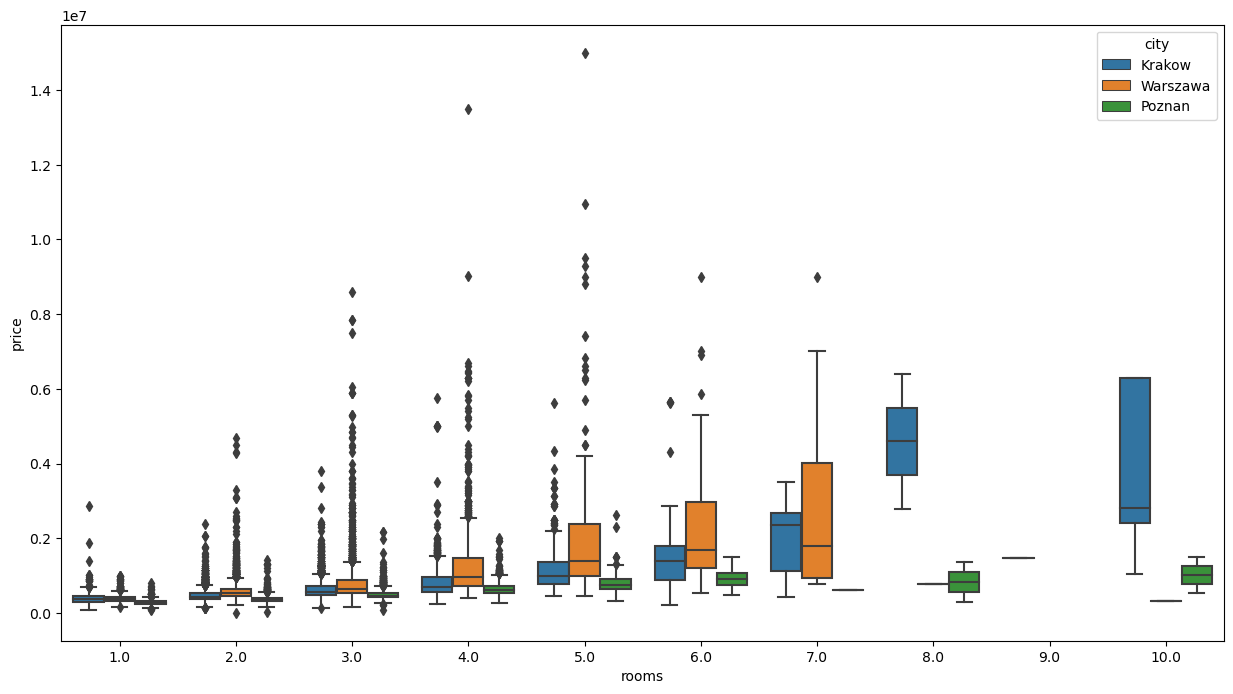

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='rooms',y='price',hue='city')

C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


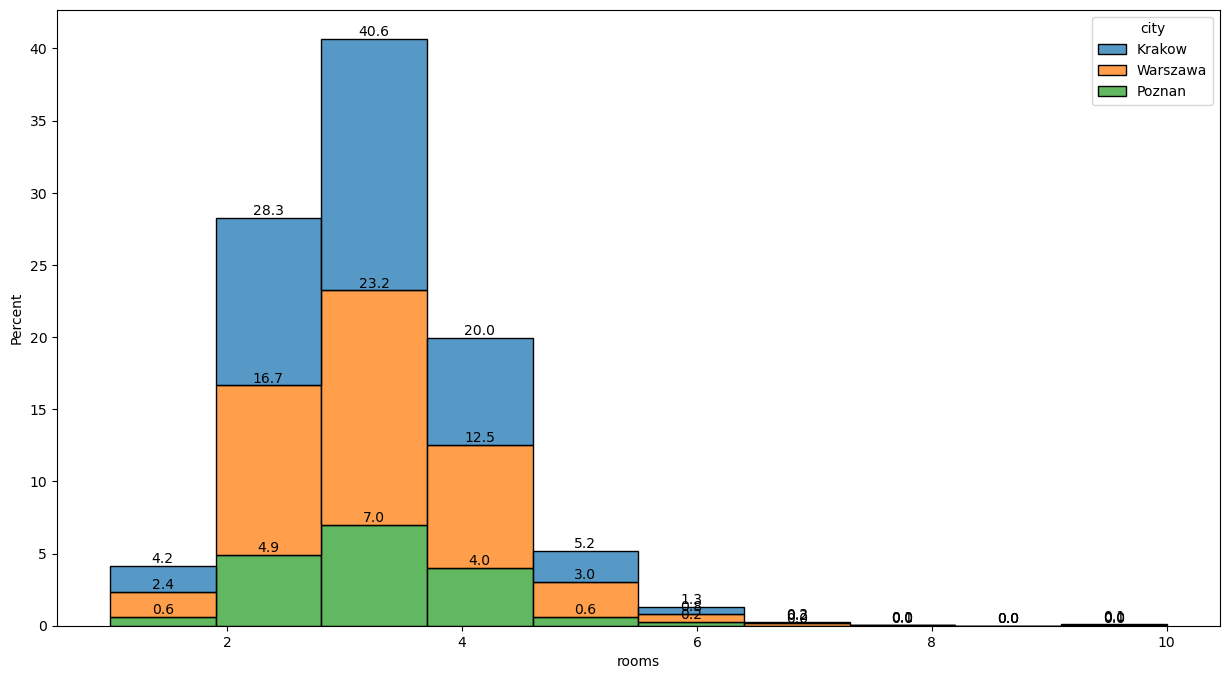

In [47]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df,x='rooms',hue='city',multiple="stack",weights='rooms',stat='percent')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


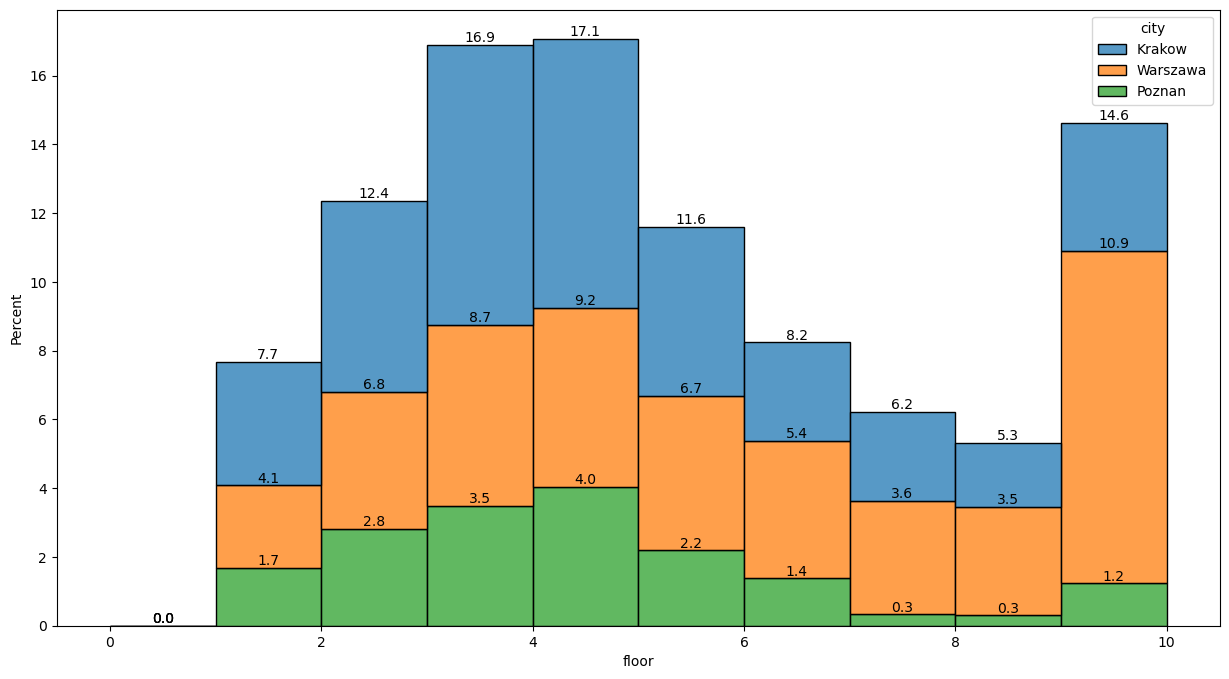

In [49]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df,x='floor',hue='city',multiple="stack",weights='floor',stat='percent')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f')

## Preparation

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
import xgboost as xgb

In [55]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Bagging
models.append(('RFR', RandomForestRegressor()))

# Boosting 
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGB', xgb.XGBRegressor()))


In [56]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [57]:
X.head()

,city,floor,rooms,sq,year
0,Krakow,2.00,3.00,74.05,2021.00
1,Warszawa,3.00,1.00,24.38,2021.00
2,Krakow,2.00,2.00,37.00,1970.00
3,Poznan,2.00,5.00,166.00,1935.00
4,Warszawa,1.00,5.00,105.00,2020.00


In [58]:
X = pd.get_dummies(X)
X.head()

,floor,rooms,sq,year,city_Krakow,city_Poznan,city_Warszawa
0,2.00,3.00,74.05,2021.00,1,0,0
1,3.00,1.00,24.38,2021.00,0,0,1
2,2.00,2.00,37.00,1970.00,1,0,0
3,2.00,5.00,166.00,1935.00,0,1,0
4,1.00,5.00,105.00,2020.00,0,0,1


### Multicollinearity
Variance inflation factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X1.shape[1])]
vif['variable'] = X1.columns
vif

,VIF,variable
0,1.03,floor
1,1.00,rooms
2,1.00,sq
3,1.01,year
4,712.93,city_Krakow
5,303.51,city_Poznan
6,714.14,city_Warszawa


#### Data Spliting and Feature scaling

In [50]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Cross validation
Mean Accuracy & Standard Deviation

In [62]:
names = []
kfold_results = []
test_results = []
train_results = []
rm = pd.DataFrame(columns=['idx','name','res'])
i = 0
for name, model in models:
    names.append(name)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    
    # for boxplot - list of arrays - the number of arrays is equal to the number of models
    # each array contains 10 measures corresponding to each cv fold's results
    kfold_results.append(cv_results)
    
    # dataframe - to show results in the table
    rm = pd.concat([rm, pd.DataFrame({'idx':[i], 'name':[name],'res': [np.median(cv_results)]})],ignore_index=True)
    i = i + 1



In [64]:
print('res -> the lower the better')
rm.sort_values('res',ascending=True)

res -> the lower the better


,idx,name,res
6,6,RFR,65568808478.69
9,9,XGB,66089966618.15
8,8,GBR,79361371644.19
3,3,KNN,96107253724.40
7,7,ABR,130869934376.98
4,4,CART,142345120434.88
1,1,LASSO,226773498547.70
0,0,LR,226869845151.53
2,2,EN,231034953153.08
5,5,SVR,320749630200.92


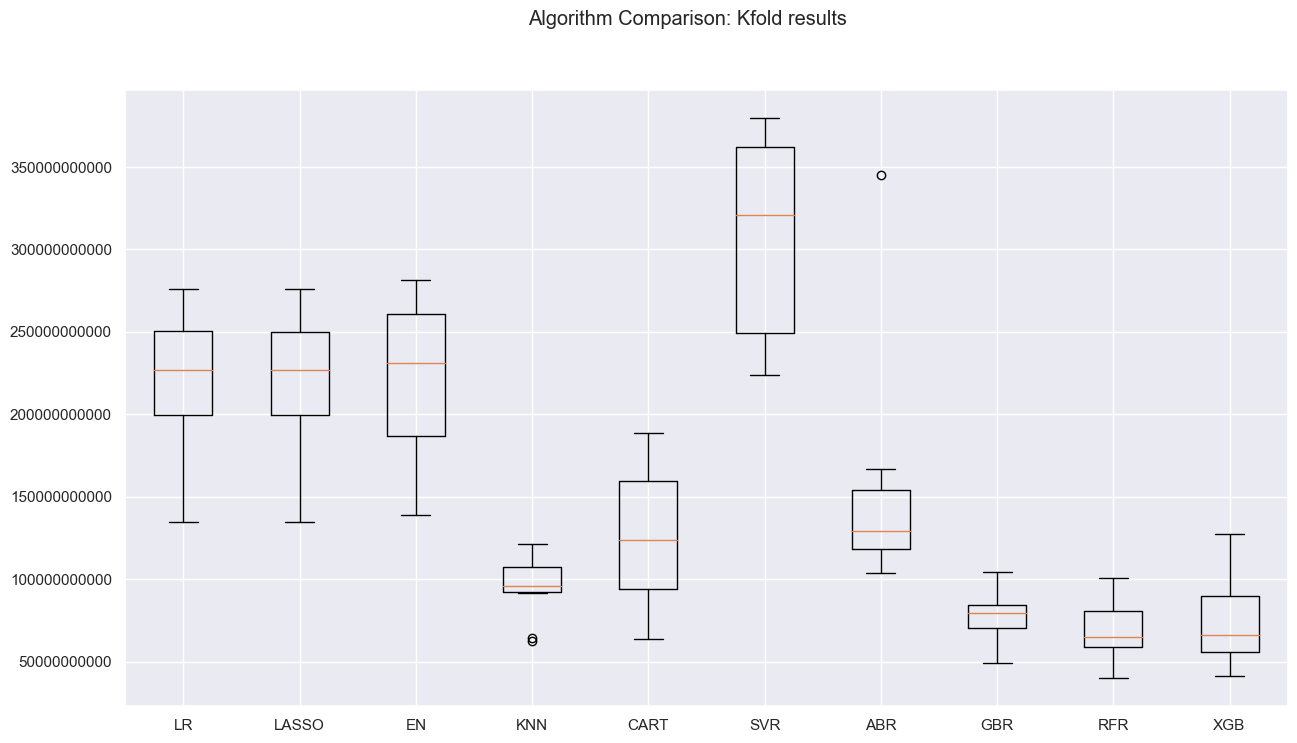

In [464]:
fig = plt.figure()

fig.suptitle('Algorithm Comparison: Kfold results\NThe lower the better')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Random Forest for feature_importances_

In [78]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.feature_importances_

array([0.08673817, 0.04708993, 0.69570111, 0.12108736, 0.00507553,
       0.01048785, 0.03382004])

In [83]:
df_imp = pd.DataFrame({'imprt':rf.feature_importances_},index=X1.columns).sort_values('imprt',ascending=False)
df_imp

,imprt
sq,0.70
year,0.12
floor,0.09
rooms,0.05
city_Warszawa,0.03
city_Poznan,0.01
city_Krakow,0.01


<AxesSubplot:>

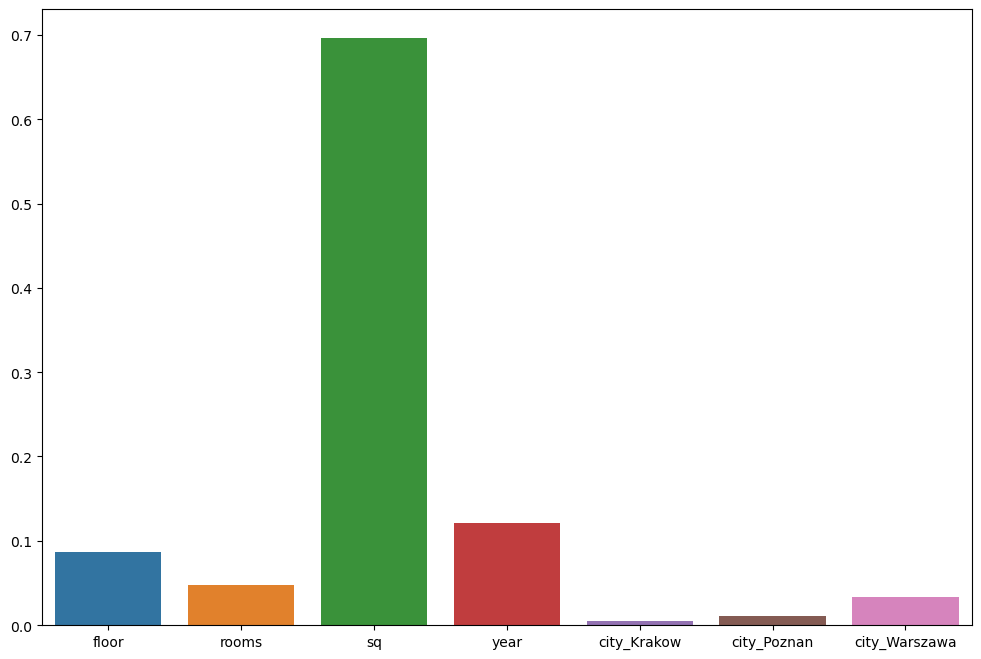

In [84]:
# df_imp.plot(kind='bar')
plt.figure(figsize=(12,8))
sns.barplot(y=rf.feature_importances_,x=X1.columns)

# Pipeline, GridSearchCV & Modelling

In [73]:
from sklearn.metrics import r2_score

In [66]:
pipe = Pipeline([
    ("classifier", xgb.XGBRegressor())])

In [67]:
sp = [
    {"classifier": [xgb.XGBRegressor(),RandomForestRegressor()],
    "classifier__n_estimators": [50,100,120,150]},
    {"classifier": [Lasso(),ElasticNet()],
    "classifier__alpha" : [0.1, 1.0, 5.0, 10.0]}
    ]

In [68]:
grid = GridSearchCV(pipe, sp, cv=5, verbose=0)

In [69]:
bm = grid.fit(X_train,y_train)

In [70]:
bm.best_params_

{'classifier': RandomForestRegressor(n_estimators=120),
 'classifier__n_estimators': 120}

### Accuracy

In [76]:
p = bm.predict(X_test)
print('GridSearchCV Accuracy: '+str(r2_score(y_test, p)))

GridSearchCV Accuracy: 0.7834666172656382


##### XGBRegressor

In [93]:
ml2 = xgb.XGBRegressor(n_estimators=120)
ml2.fit(X_train,y_train)
p2 = ml2.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test,p2))

244991.1548243024

In [95]:
np.sqrt(mean_squared_error(y_test,p2))

244991.1548243024

In [96]:
print(r2_score(y_test, p2))

0.7720092871842771


# Neural Network

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [98]:
from keras.callbacks import EarlyStopping

In [99]:
X_train.shape

(16634, 7)

In [100]:
X_train.shape[0]

16634

In [101]:
X_train.shape[1]

7

In [338]:
nm = Sequential()

In [358]:
nm.add(Dense(units=50, activation='relu'))
nm.add(Dropout(0.15))
nm.add(Dense(units=30, activation='relu'))
nm.add(Dense(units=30, activation='relu'))
nm.add(Dense(units=1, activation='relu'))

In [359]:
es = EarlyStopping(monitor='val_loss',patience=50)

In [360]:
nm.compile(loss='mse',optimizer='adam')

In [361]:
history = nm.fit(x=X_train,y=y_train.values,epochs=500,batch_size=128, callbacks=[es],validation_data=(X_test,y_test.values))


Epoch 1/500
130/130 [==============================] - 1s 3ms/step - loss: 267367219200.0000 - val_loss: 154655363432448.0000
Epoch 2/500
130/130 [==============================] - 0s 2ms/step - loss: 205166149632.0000 - val_loss: 142842039107584.0000
Epoch 3/500
130/130 [==============================] - 0s 1ms/step - loss: 206331265024.0000 - val_loss: 117287252131840.0000
Epoch 4/500
130/130 [==============================] - 0s 2ms/step - loss: 209353539584.0000 - val_loss: 101589859696640.0000
Epoch 5/500
130/130 [==============================] - 0s 2ms/step - loss: 208014983168.0000 - val_loss: 110880033341440.0000
Epoch 6/500
130/130 [==============================] - 0s 2ms/step - loss: 204605521920.0000 - val_loss: 99121704730624.0000
Epoch 7/500
130/130 [==============================] - 0s 2ms/step - loss: 204121833472.0000 - val_loss: 121494935961600.0000
Epoch 8/500
130/130 [==============================] - 0s 2ms/step - loss: 205559906304.0000 - val_loss: 12621767193395

<AxesSubplot:>

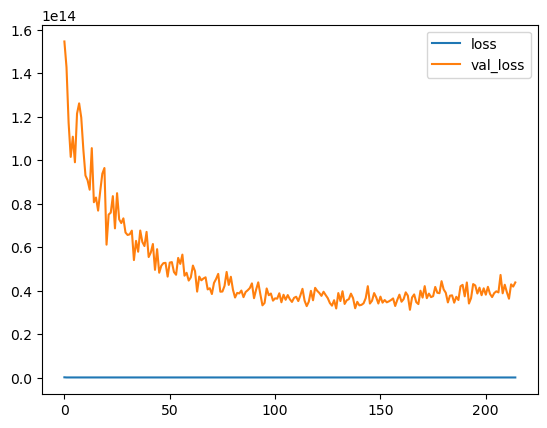

In [362]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [363]:
predictions = nm.predict(X_test)

223/223 [==============================] - 0s 491us/step


In [364]:
np.sqrt(mean_squared_error(y_test,predictions))

6624199.4270751625

In [365]:
y_test.mean()

641935.129754558

In [366]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [367]:
explained_variance_score(y_test,predictions)

-165.67972652954793

In [368]:
print(r2_score(y_test, predictions))

-165.6798666171523


In [369]:
df.describe()

,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00,23764.00
mean,2.81,15621.96,51.37,19.86,649353.65,2.62,102.72,2000.55
std,2.46,8617.29,1.10,1.45,532696.99,1.00,6533.69,48.31
min,0.00,1.00,49.93,4.20,5000.00,1.00,8.80,70.00
25%,1.00,8420.75,50.07,19.92,411546.12,2.00,42.00,1985.00
50%,2.00,15637.50,52.19,20.00,520000.00,3.00,53.89,2019.00
75%,4.00,23111.25,52.27,21.00,699999.00,3.00,68.91,2021.00
max,10.00,30308.00,54.44,30.32,15000000.00,10.00,1007185.00,2980.00


In [370]:
df01.describe()

,floor,id,latitude,longitude,price,rooms,sq,year
count,17874.00,17874.00,17874.00,17874.00,17874.00,17874.00,17874.00,17874.00
mean,2.68,15851.88,51.32,19.77,667631.27,2.67,61.45,2016.08
std,2.36,8847.47,1.11,1.46,567889.51,1.00,29.13,8.39
min,0.00,1.00,49.93,12.37,5000.00,1.00,8.80,1985.00
25%,1.00,8142.50,50.06,19.90,419000.00,2.00,43.64,2014.00
50%,2.00,16212.50,52.18,19.99,532000.00,3.00,56.00,2020.00
75%,4.00,23694.75,52.28,20.98,721398.75,3.00,71.00,2021.00
max,10.00,30308.00,54.41,22.63,15000000.00,10.00,442.20,2024.00


# After getting rid of outliers

In [382]:
# df01 = df[(df['year']<=2025) & (df['year']>=1985)]
# df01 = df01[df['sq']<=8000]

In [371]:
y0 = df01['price']
X0 = df01.drop(['id','address','price','full_address','latitude','longitude'],axis=1)
X0.head()

,city,floor,rooms,sq,year
0,Krakow,2.00,3.00,74.05,2021.00
1,Warszawa,3.00,1.00,24.38,2021.00
4,Warszawa,1.00,5.00,105.00,2020.00
5,Krakow,2.00,1.00,34.55,2022.00
6,Krakow,0.00,4.00,81.40,2021.00


In [372]:
X0 = pd.get_dummies(X0)
X0.head()

,floor,rooms,sq,year,city_Krakow,city_Poznan,city_Warszawa
0,2.00,3.00,74.05,2021.00,1,0,0
1,3.00,1.00,24.38,2021.00,0,0,1
4,1.00,5.00,105.00,2020.00,0,0,1
5,2.00,1.00,34.55,2022.00,1,0,0
6,0.00,4.00,81.40,2021.00,1,0,0


In [373]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.3, random_state=42)

In [374]:
scaler = StandardScaler()
X_train0 = scaler.fit_transform(X_train0)
X_test0 = scaler.transform(X_test0)

In [375]:
nm = Sequential()
nm.add(Dense(units=50, activation='relu'))
nm.add(Dropout(0.15))
nm.add(Dense(units=30, activation='relu'))
nm.add(Dropout(0.15))
nm.add(Dense(units=30, activation='relu'))
nm.add(Dense(units=1, activation='relu'))

In [376]:
es = EarlyStopping(monitor='val_loss',patience=50)
nm.compile(loss='mse',optimizer='adam')

In [377]:
history = nm.fit(x=X_train0,y=y_train0.values,epochs=500,batch_size=128, callbacks=[es],validation_data=(X_test0,y_test0.values))


Epoch 1/500
98/98 [==============================] - 1s 2ms/step - loss: 785969840128.0000 - val_loss: 726663036928.0000
Epoch 2/500
98/98 [==============================] - 0s 1ms/step - loss: 785229938688.0000 - val_loss: 724483178496.0000
Epoch 3/500
98/98 [==============================] - 0s 1ms/step - loss: 778668015616.0000 - val_loss: 711547289600.0000
Epoch 4/500
98/98 [==============================] - 0s 2ms/step - loss: 754467143680.0000 - val_loss: 673468841984.0000
Epoch 5/500
98/98 [==============================] - 0s 1ms/step - loss: 697043255296.0000 - val_loss: 596213497856.0000
Epoch 6/500
98/98 [==============================] - 0s 1ms/step - loss: 598311632896.0000 - val_loss: 478106025984.0000
Epoch 7/500
98/98 [==============================] - 0s 1ms/step - loss: 463770419200.0000 - val_loss: 343821647872.0000
Epoch 8/500
98/98 [==============================] - 0s 1ms/step - loss: 337322377216.0000 - val_loss: 236754173952.0000
Epoch 9/500
98/98 [=============

<AxesSubplot:>

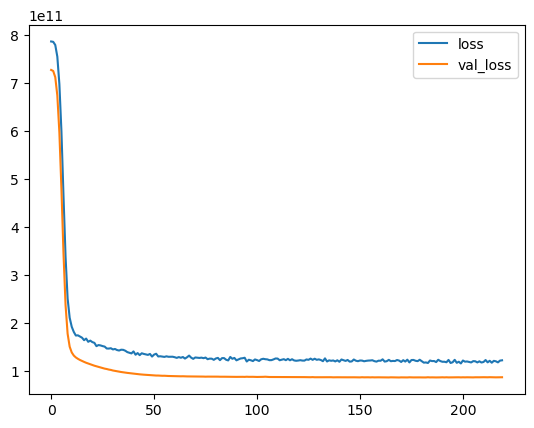

In [378]:
model_loss = pd.DataFrame(history.history)
model_loss.plot()

In [379]:
predictions = nm.predict(X_test0)

168/168 [==============================] - 0s 479us/step


In [380]:
np.sqrt(mean_squared_error(y_test0,predictions))

293752.6461455732

In [381]:
print(r2_score(y_test0, predictions))

0.7017895663534552
